In [1]:
import cv2
import json
import matplotlib.pyplot as plt
import tqdm
import glob

In [15]:
# with open('/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_coco/annotations/train_annotations.coco.json') as f:
#     data = json.load(f)


with open("/home/fer/Escritorio/futstatistics/datasets/field/keypoints3/annotations/train_annotations.coco.json") as f:
    data = json.load(f)

In [16]:
anns = data['annotations']
imgs_anns = data['images']


In [85]:
anns_0 = [ann for ann in anns if ann['category_id'] == 0]
anns_0

[]

In [17]:
images = glob.glob("/home/fer/Escritorio/futstatistics/datasets/field/keypoints3/train/*")

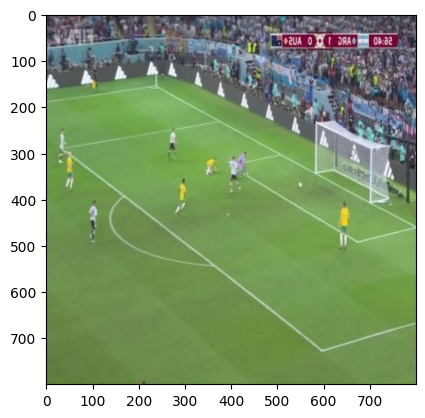

In [73]:
i = 19

img = cv2.imread(images[i])

filename = images[i].split('/')[-1]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [74]:
img_id = [image['id'] for image in imgs_anns if image['file_name'] == "filename"][0]
anns_0 = [ann for ann in anns if ann['image_id'] == img_id]
print(anns_0)

[{'id': 567, 'image_id': 68, 'category_id': 21, 'bbox': [37, 516, 19, 25], 'area': 475, 'segmentation': [], 'iscrowd': 0}, {'id': 568, 'image_id': 68, 'category_id': 20, 'bbox': [279, 408, 13.5, 19], 'area': 256.5, 'segmentation': [], 'iscrowd': 0}, {'id': 569, 'image_id': 68, 'category_id': 19, 'bbox': [423, 346, 19, 15.5], 'area': 294.5, 'segmentation': [], 'iscrowd': 0}, {'id': 570, 'image_id': 68, 'category_id': 18, 'bbox': [617, 258, 11.5, 15.5], 'area': 178.25, 'segmentation': [], 'iscrowd': 0}, {'id': 571, 'image_id': 68, 'category_id': 17, 'bbox': [711, 214, 15.5, 19], 'area': 294.5, 'segmentation': [], 'iscrowd': 0}, {'id': 572, 'image_id': 68, 'category_id': 14, 'bbox': [690, 281, 13.5, 13.5], 'area': 182.25, 'segmentation': [], 'iscrowd': 0}, {'id': 573, 'image_id': 68, 'category_id': 15, 'bbox': [496, 373, 15.5, 17.5], 'area': 271.25, 'segmentation': [], 'iscrowd': 0}, {'id': 574, 'image_id': 68, 'category_id': 13, 'bbox': [533, 529, 15.5, 23], 'area': 356.5, 'segmentation'

21
20
19
18
17
14
15
13
11


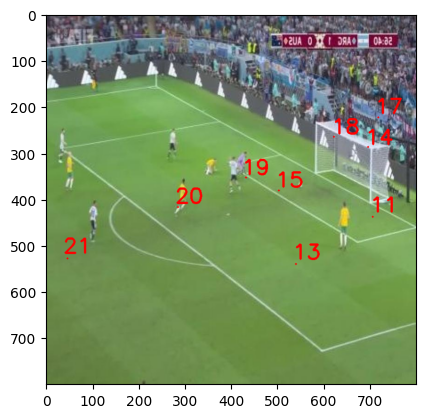

In [75]:
image_ann = img.copy()

for ann in anns_0:
    bbox = ann['bbox']
    top_left = (bbox[0], bbox[1])
    bottom_right = (bbox[0] + bbox[2], bbox[1] + bbox[3])
    center_x = int((bottom_right[0] + top_left[0]) / 2)
    center_y = int((bottom_right[1] + top_left[1]) / 2)

    # Store the calculated values in a tuple to represent the center of the box
    center = (center_x, center_y)
    # print(f'BBOX: {bbox}')
    image_ann = cv2.circle(image_ann, center, 2, (255, 0, 0), -1)
    image_ann = cv2.putText(image_ann, str(ann['category_id']), (bbox[0], bbox[1]), cv2.FONT_HERSHEY_SIMPLEX, 01.5, (255, 0, 0),4)

    print(str(ann['category_id']))
    # print(f"P1 : {(bbox[0] - 10 , bbox[1] - 10)}")
    # print(f"P2 : {(bbox[0] + 10, bbox[1] + 10)}")
    # print("-------------------------------------")

plt.imshow(image_ann)